In [1]:
# imports
import os,sys
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import time

# import some helper functions
from proc_helpers import create_buffer_point_polygon_overlay_v2, \
                         pp_summarize_ndvi_with_qa_dir, \
                         create_buffer_point_polygon_overlay

In [2]:
shpfile = '../testing_villages/Agin_Villages.shp'
df = gpd.read_file(shpfile)
print(df.crs)

{'init': 'epsg:32736'}


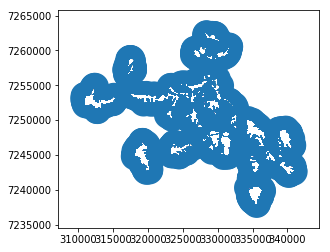

In [13]:
# buff_erase_df = create_buffer_point_polygon_overlay(df, method='difference', num_points=2)

# use this one for the points specified in the shapefile (_v2)
buff_erase_df = create_buffer_point_polygon_overlay_v2(df, method='difference') 
buff_erase_df.crs = {'init' :'epsg:32736'}
buff_erase_df.plot()

In [14]:
# this will show you how many geometries now exist for processing
buff_erase_df.shape

(2857, 2)

## get the NDVI and pixel_qa raster paths and check that they match up
### specify the qa_dir and ndvi_dir with trailing '/' character or the functions will not run

In [5]:
qa_dir = '../landsat/test/qa/'
ndvi_dir = '../landsat/test/ndvi/'


In [6]:
t0 = time.time()
test_function_pp = pp_summarize_ndvi_with_qa_dir(ndvi_dir, qa_dir, buff_erase_df, 'median')
t1 = time.time()

## the number of cores and geometries will change...
#print('parallel across 6 cores and 28 geometries is: {}'.format(t1-t0))


## don't run this, it operates in serial and is slow
# t0 = time.time()
# test_function = summarize_ndvi_with_qa_dir(ndvi_dir, qa_dir, buff_erase_df, 'median')
# t1 = time.time()
# print('serial and 28 geometries is: {}'.format(t1-t0))

epsg_df: 32736, epsg_raster: 32636
epsg_df: {'init': 'epsg:32636', 'no_defs': True}, epsg_raster: 32636
parallel across 6 cores and 28 geometries is: 242.0050642490387


C:\projects\RD\south_africa\jp\proc_helpers.py:431: UserWarning: Warning: converting a masked element to nan.
  ndvi_df = geo_df.join(pd.DataFrame(np.array(all_vals).T, columns=landsat_columns), how='outer')


In [ ]:
# change the output filename to your desire
test_function_pp.to_crs(epsg=32736).to_file('test_landsat_summaries_1997_2017_median_maskCloudWater.shp')

# everything below here is testing and doesn't need to run
## test number of points for scaling